In [35]:
import csv
from sklearn import svm
import numpy as np
import Loader
import tensorflow as tf
import Transformer
import ModelFile
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import MeanSquaredError
plt.rcParams['font.family'] = 'serif'

compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0)

#all the data manipulation is normalizing and determining the binary classification
trainData, testData, valData = Transformer.normalizeData(compoundDataTrain, compoundDataTest, 
                                                         compoundDataValidate, newMean=0, newStd=1)

trainClass = Transformer.toBinaryClassification(activitiesTrain)
testClass = Transformer.toBinaryClassification(activitiesTest)
valClass = Transformer.toBinaryClassification(activitiesValidate)

In [12]:
regrNNCombo = ModelFile.load("comboRegrNN.h5")
regrSVRCombo = ModelFile.load("comboRegrSVR.pkl")
regrSVM = ModelFile.load("comboRegrSVM.pkl")
regrSVR = ModelFile.load("svrRegr1.pkl")

def evalData(inputData, svmModel, svrModel, zeroGuess=0): #given the models and data points evaluate
    finalPred = np.ones(len(inputData))*zeroGuess #how many predictions we should have
    binaryClass = svmModel.predict(inputData)
    
    regrPredict = svrModel.predict(inputData[binaryClass == 1]) #regression high activity prediction
    finalPred[binaryClass == 1] = regrPredict #set the high activity guesses, otherwise 0
    return finalPred

def evalData2(inputData, svmModel, nnModel, zeroGuess=0): #same as above but use NN for regr
    finalPred = np.ones(len(inputData))*zeroGuess #how many predictions we should have
    binaryClass = svmModel.predict(inputData)
    
    regrPredict = nnModel.predict(inputData[binaryClass == 1]).flatten() #high activity regr predict
    finalPred[binaryClass == 1] = regrPredict #set the high activity guesses, otherwise 0
    return finalPred

Model Description: 
See Regression Models (SVR and NN) code file. Used for a combo regression model, svm used for binary classification, then either SVR or NN for regression of high activity model. Use constant guess of about .7 for best mean square error. This is the NN Portion for regr of high activity.
Model Description: 
See Regression Models (SVR and NN) code file. Used for a combo regression model, svm used for binary classification, then either SVR or NN for regression of high activity model. Use constant guess of about .7 for best mean square error. This is the SVR option for regr of high activity.
Model Description: 
See Regression Models (SVR and NN) code file. Used for a combo regression model, svm used for binary classification, then either SVR or NN for regression of high activity model. Use constant guess of about .7 for best mean square error. This is the SVM Portion.
Model Description: 
Regression SVR, Ein Error:  0.3554315571414324Eval Error:  2.215028194809491. See Re

In [14]:
trainAcc1 = mean_squared_error(regrSVR.predict(trainData),activitiesTrain)
valAcc1 = mean_squared_error(regrSVR.predict(valData),activitiesValidate)
testAcc1 = mean_squared_error(regrSVR.predict(testData),activitiesTest)

print("Regr SVR: ")
print("\ttrain Error: ", trainAcc1)
print("\tval Error: ", valAcc1)
print("\ttest Error: ", testAcc1)

trainAcc2 = mean_squared_error(evalData(trainData,regrSVM,regrSVRCombo),activitiesTrain)
valAcc2 = mean_squared_error(evalData(valData,regrSVM,regrSVRCombo),activitiesValidate)
testAcc2 = mean_squared_error(evalData(testData,regrSVM,regrSVRCombo),activitiesTest)

print("\nCombo SVM+SVR: ")
print("\ttrain Error: ", trainAcc2)
print("\tval Error: ", valAcc2)
print("\ttest Error: ", testAcc2)

trainAcc3 = mean_squared_error(evalData2(trainData,regrSVM,regrNNCombo),activitiesTrain)
valAcc3 = mean_squared_error(evalData2(valData,regrSVM,regrNNCombo),activitiesValidate)
testAcc3 = mean_squared_error(evalData2(testData,regrSVM,regrNNCombo),activitiesTest)

print("\nCombo SVM+NN: ")
print("\ttrain Error: ", trainAcc3)
print("\tval Error: ", valAcc3)
print("\ttest Error: ", testAcc3)

Regr SVR: 
	train Error:  0.3554315915812212
	val Error:  2.2150281861077254
	test Error:  1.7680663855523535

Combo SVM+SVR: 
	train Error:  0.18388117391797554
	val Error:  2.377447141783236
	test Error:  1.9265646733428847

Combo SVM+NN: 
	train Error:  0.2202968406262556
	val Error:  2.454351239742961
	test Error:  2.0241972587184467


<Figure size 1296x576 with 0 Axes>

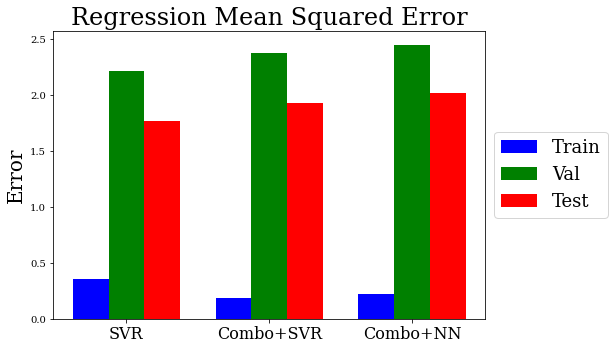

In [58]:
X = np.arange(3)
fig = plt.figure(figsize=(18,8),facecolor=(1, 1, 1))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X+.25, [trainAcc1, trainAcc2, trainAcc3], color="blue",  width=.25, label="Train")
ax.bar(X+.5, [valAcc1, valAcc2, valAcc3],        color="green", width=.25, label="Val")
ax.bar(X+.75, [testAcc1, testAcc2, testAcc3],    color="red",   width=.25, label="Test")

ax.set_title("Regression Mean Squared Error", fontsize=24)
#ax.set_xlabel("Model", fontsize=20)
ax.set_ylabel("Error", fontsize=20)
ax.set_xticks([.5, 1.5, 2.5])
ax.set_xticklabels(["SVR", "Combo+SVR", "Combo+NN"], fontsize=16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)

plt.savefig("../Figures/RegressionBar.png")